1.Vấn đề cần xử lý: Làm thế nào để tăng lợi nhuận của siêu thị
-Sản phầm mũi nhọn từng khu vực
-Sản phẩm tiềm năng từng khu vực
-Sản phẩm yếu kém từng khu vực
=> Sản phẩm yếu khem khu vực này có phải là sản phẩm mũi nhọn hoặc tiềm năng khu vực khác không ? 

2.Chuẩn bị dữ liệu

2.1 Load dữ liệu

In [7]:
!pip install kaggle
import kaggle
!kaggle datasets download fatihilhan/global-superstore-dataset -f superstore.csv

Dataset URL: https://www.kaggle.com/datasets/fatihilhan/global-superstore-dataset
License(s): MIT
superstore.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('superstore.csv.zip') 
zip_ref.extractall() # extract file to dir
zip_ref.close() # close file

In [9]:
import pandas as pd
df = pd.read_csv('superstore.csv')

2.2 Làm sạch dữ liệu

In [11]:
df.head(5)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [13]:
#sửa lại định dạng các cột
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace('.','_')

In [14]:
#xóa cột thừa
df=df.drop(columns=['记录数','shipping_cost','ship_mode','ship_date','segment','customer_id','customer_name','region','product_id','year','market'])

In [15]:
#sủa định dạng ngày
df['order_date']=pd.to_datetime(df['order_date'],format="%Y-%m-%d %H:%M:%S.%f")
df['year']=df['order_date'].dt.year

In [16]:
df.head(5)

,category,city,country,discount,order_date,order_id,order_priority,product_name,profit,quantity,row_id,sales,state,sub_category,market2,weeknum,year
0,Office Supplies,Los Angeles,United States,0.0,2011-01-07,CA-2011-130813,High,Xerox 225,9.3312,3,36624,19,California,Paper,North America,2,2011
1,Office Supplies,Los Angeles,United States,0.0,2011-01-21,CA-2011-148614,Medium,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,37033,19,California,Paper,North America,4,2011
2,Office Supplies,Los Angeles,United States,0.0,2011-08-05,CA-2011-118962,Medium,"Adams Phone Message Book, Professional, 400 Me...",9.8418,3,31468,21,California,Paper,North America,32,2011
3,Office Supplies,Los Angeles,United States,0.0,2011-08-05,CA-2011-118962,Medium,Xerox 1913,53.2608,2,31469,111,California,Paper,North America,32,2011
4,Office Supplies,Los Angeles,United States,0.0,2011-09-29,CA-2011-146969,High,Xerox 223,3.1104,1,32440,6,California,Paper,North America,40,2011


In [17]:
df.dtypes

category                  object
city                      object
country                   object
discount                 float64
order_date        datetime64[ns]
order_id                  object
order_priority            object
product_name              object
profit                   float64
quantity                   int64
row_id                     int64
sales                      int64
state                     object
sub_category              object
market2                   object
weeknum                    int64
year                       int32
dtype: object

3.Trực quan và phân tích

3.1 Over view

In [20]:
#thêm thư viện trực quan 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

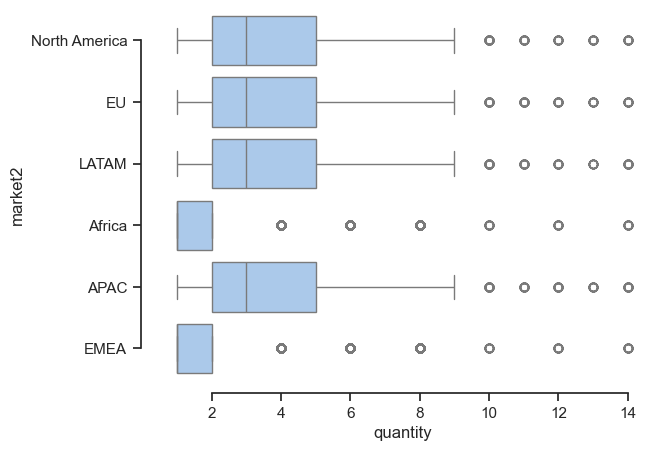

In [21]:
#phân bổ của dữ liệu
sns.set_theme(style="ticks", palette="pastel")
#hàm tính toán

#Draw a nested boxplot to show bills by day and time
sns.boxplot(x="quantity", 
            y="market2",
            hue=None,
            data=df)
sns.despine(offset=10, trim=True)

Tổng profit theo khu vực

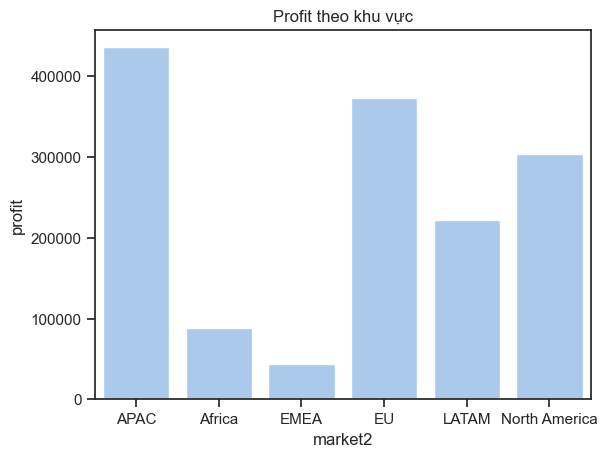

In [23]:
#Hàm tính toán
Total_profit=df.groupby('market2')['profit'].sum().reset_index()
#vẽ biểu đồ
sns.barplot(
    x="market2", 
    y="profit", 
    data=Total_profit)
plt.title("Profit theo khu vực")
plt.show()

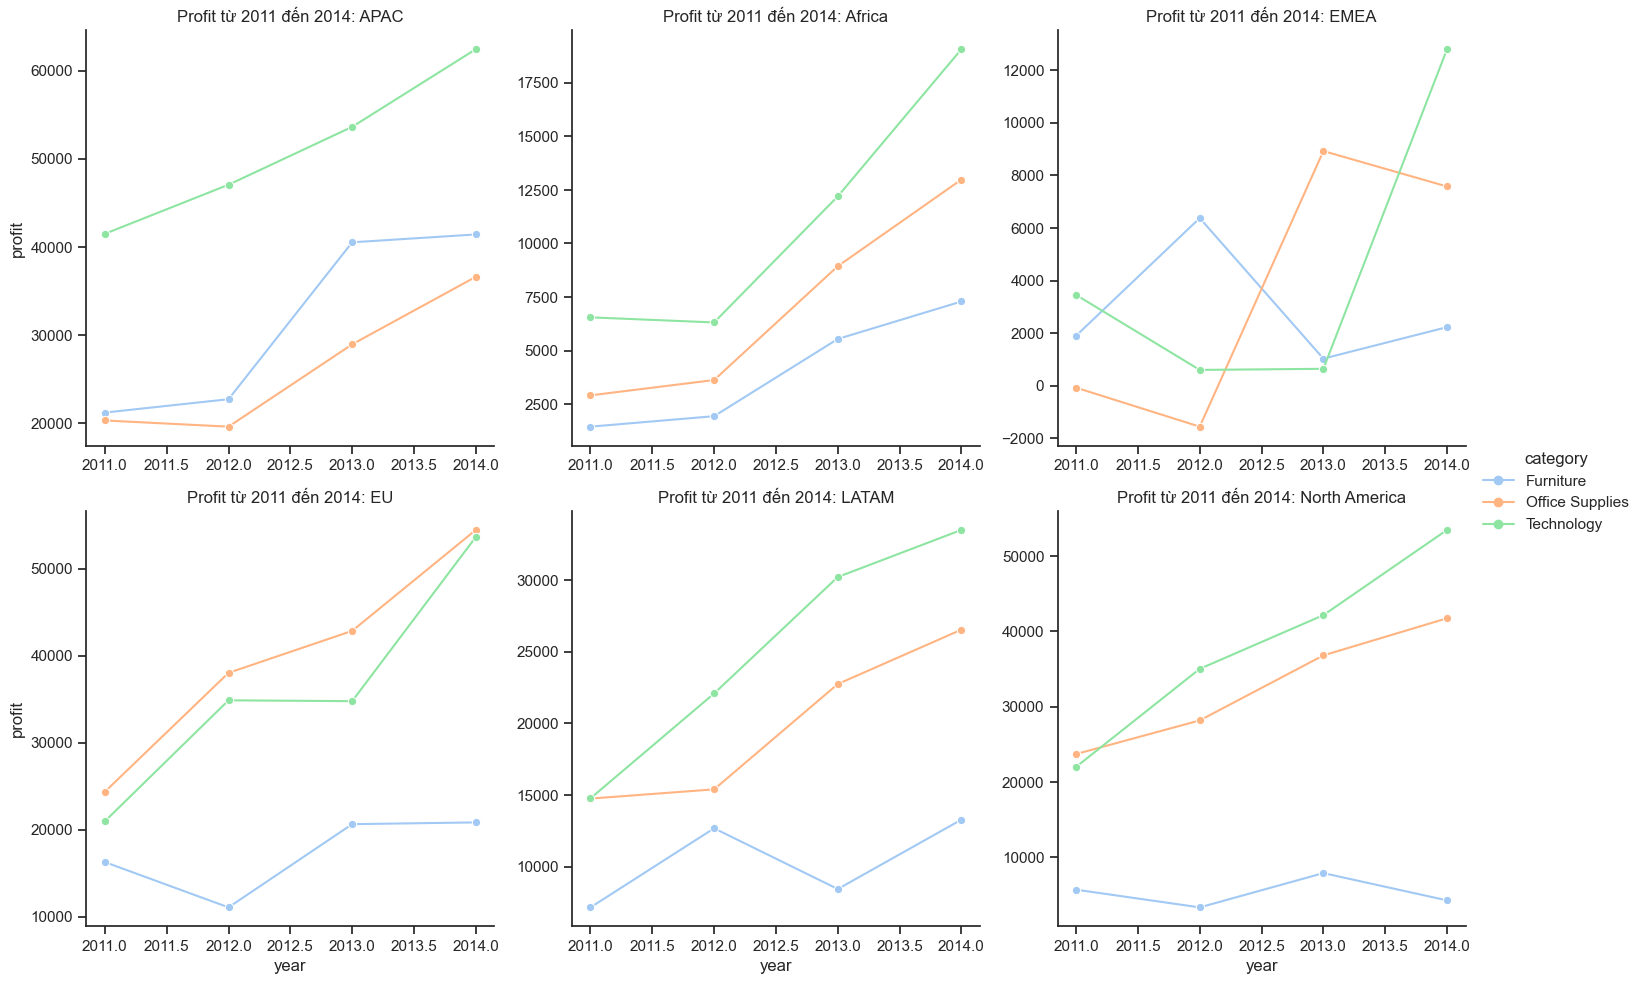

In [24]:
#Hàm tính toán
Total_profit_year=df.groupby(['market2','year','category'])['profit'].sum().reset_index()
#Vẽ biểu đồ
Line_1=sns.relplot(
    data=Total_profit_year, #bảng dữ liệu lấy giá trị
    kind="line", #loại hiển thị
    x="year", # giá trị cột x
    y="profit", #giá trị cột y
    hue='category', #Phân lớp hạng mục
    col="market2", #tách biểu đồ theo market2
    col_wrap=3, # số biểu đồ 1 hàng
    facet_kws={'sharex': False, 'sharey': False}, # không chia sẻ layber
    marker="o" #hiển thị điểm nút
)
Line_1.set_titles("Profit từ 2011 đến 2014: {col_name}") #titles từng bảng theo col


Đánh giá khu vực APAC : 
Đánh giá khu vực Afica :
Đánh giá khu vực EMEA :
Đánh giá khu vực EU : 
Đánh giá khu vực Lamat :
Đánh giá khu vực North America :

3.2 Đánh giá theo khu vực

3.2.1 Khu vực APAC

In [28]:
#dữ liệu riêng APAC
df_APAC=df[df['market2']=='APAC']
df_APAC.head(5)

,category,city,country,discount,order_date,order_id,order_priority,product_name,profit,quantity,row_id,sales,state,sub_category,market2,weeknum,year
3318,Office Supplies,Hyderabad,India,0.0,2011-01-26,IN-2011-31496,High,"Eaton Computer Printout Paper, Recycled",25.38,3,23290,79,Telangana,Paper,APAC,5,2011
3319,Office Supplies,Kowloon,Hong Kong,0.0,2011-02-14,IN-2011-22662,Medium,"Stockwell Clamps, Bulk Pack",5.13,3,29672,58,Hong Kong,Fasteners,APAC,8,2011
3329,Office Supplies,Jieyang,China,0.0,2011-04-16,IN-2011-74490,High,"Wilson Jones Hole Reinforcements, Durable",0.54,3,22110,18,Guangdong,Binders,APAC,16,2011
3330,Office Supplies,Jieyang,China,0.0,2011-04-16,IN-2011-74490,High,"Jiffy Interoffice Envelope, with clear poly wi...",57.96,4,22106,200,Guangdong,Envelopes,APAC,16,2011
3331,Office Supplies,Jieyang,China,0.0,2011-04-16,IN-2011-74490,High,"Green Bar Cards & Envelopes, Recycled",70.92,3,22111,145,Guangdong,Paper,APAC,16,2011


           category  year        profit    sales  profit_margin
0         Furniture  2011   53696.92640   756171       0.071012
1         Furniture  2012   58132.83400   858913       0.067682
2         Furniture  2013   84062.90050  1117739       0.075208
3         Furniture  2014   89312.06290  1378061       0.064810
4   Office Supplies  2011   85996.53430   675642       0.127281
5   Office Supplies  2012  103305.50780   795113       0.129926
6   Office Supplies  2013  149245.73580  1010793       0.147652
7   Office Supplies  2014  179926.05640  1305782       0.137792
8        Technology  2011  109247.35084   827698       0.131989
9        Technology  2012  145976.93730  1023467       0.142630
10       Technology  2013  173626.59388  1277328       0.135930
11       Technology  2014  234927.85116  1616198       0.145358


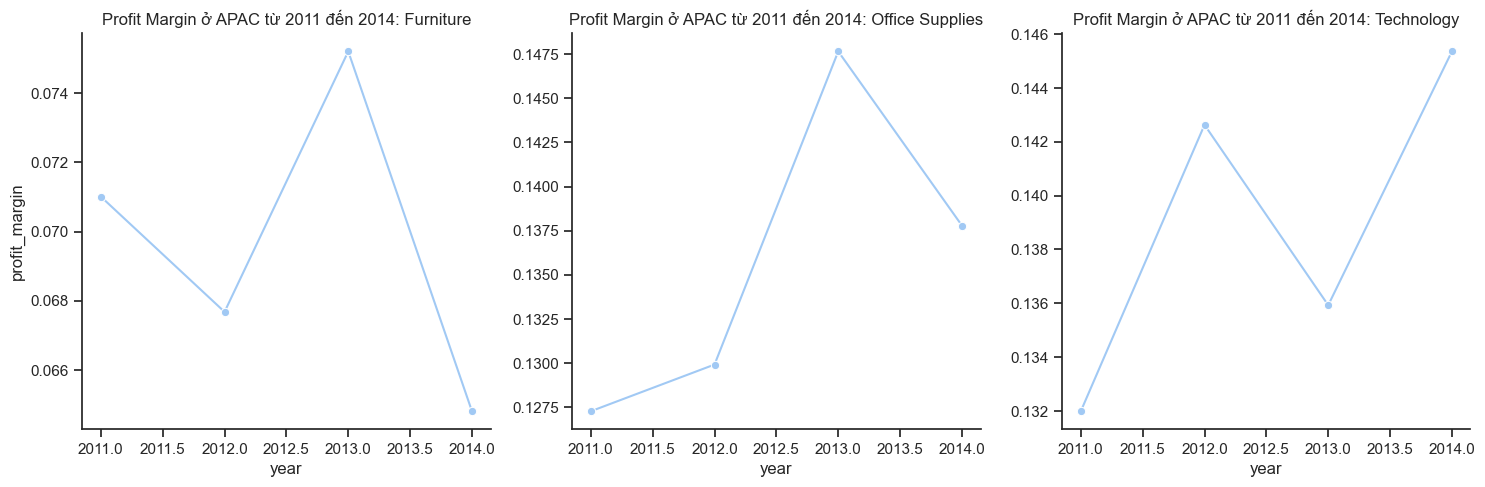

In [29]:
#profit margin qua từng năm
#hàm tính toán
df_APAC_category=df.groupby(['category','year'])[['profit','sales']].sum().reset_index()
df_APAC_category['profit_margin']=df_APAC_category['profit']/df_APAC_category['sales']
#vẽ biểu đồ
line_APAC_category=sns.relplot(
    data=df_APAC_category, #bảng dữ liệu lấy giá trị
    kind="line", #loại hiển thị
    x="year", # giá trị cột x
    y="profit_margin", #giá trị cột y
    col="category", #tách biểu đồ theo market2
    hue=None, #Phân lớp hạng mục
    col_wrap=3, # số biểu đồ 1 hàng
    facet_kws={'sharex': False, 'sharey': False}, # không chia sẻ layber
    marker="o" #hiển thị điểm nút
)
line_APAC_category.set_titles("Profit Margin ở APAC từ 2011 đến 2014: {col_name}") #titles từng bảng theo col
print(df_APAC_category)

Nhận xét 

3.2.1.1 Khu vực APAC ( Furniture )

C:\Users\Admin\AppData\Local\Temp\ipykernel_13800\3640340067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_APAC_Furniture['profit_margin']=df_APAC_Furniture['profit']/df_APAC_Furniture['sales']


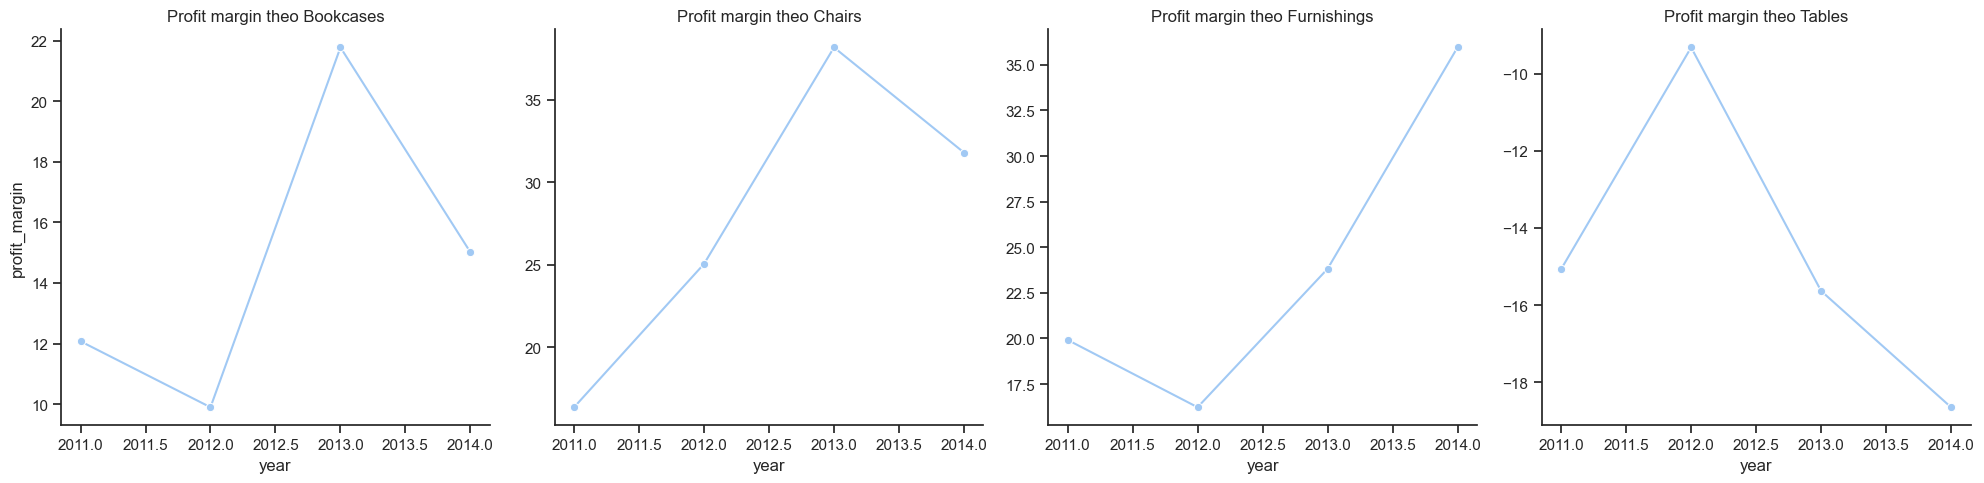

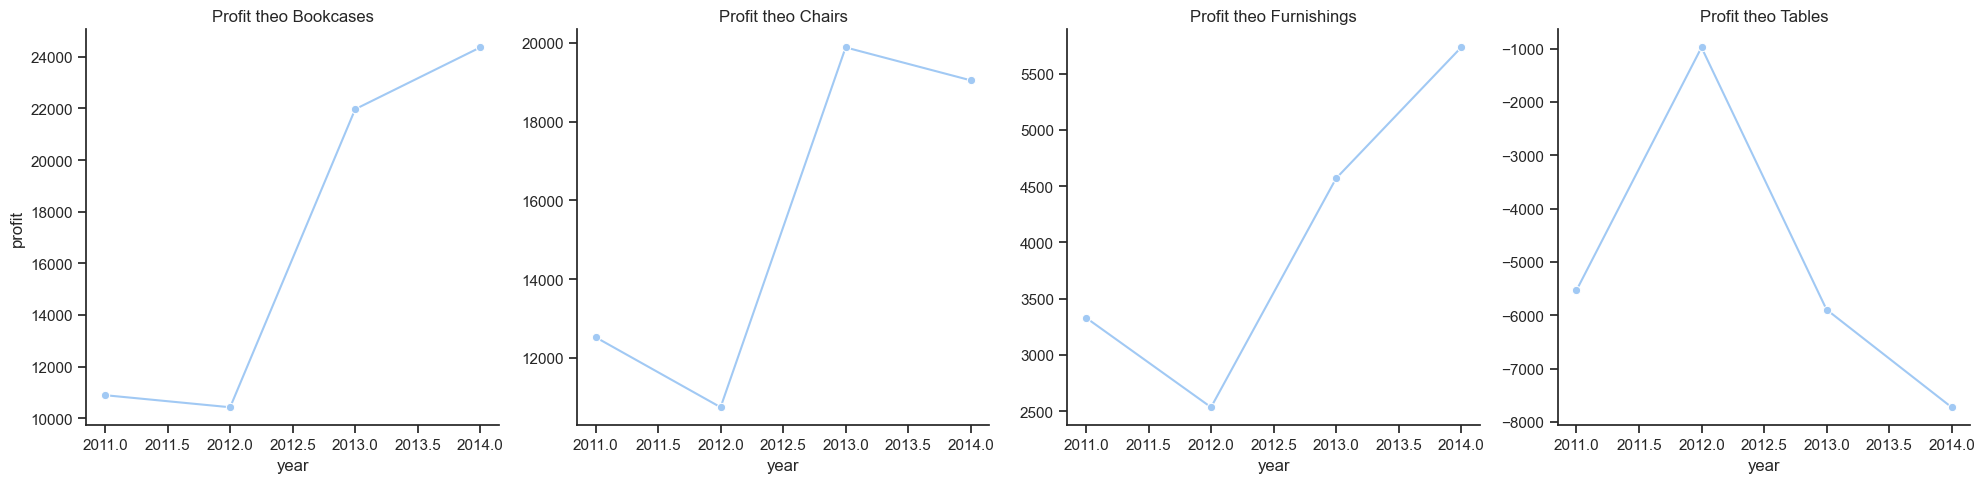

In [32]:
#Profit margin
# Hàm tính toán
df_APAC_Furniture=df_APAC[df_APAC['category']=='Furniture']
df_APAC_Furniture['profit_margin']=df_APAC_Furniture['profit']/df_APAC_Furniture['sales']
df_APAC_Furniture_groupby_profitmargin=df_APAC_Furniture.groupby(['sub_category','year'])['profit_margin'].sum().reset_index()
# vẽ biểu đồ
Line_char_1=sns.relplot(
    data=df_APAC_Furniture_groupby_profitmargin, #bảng dữ liệu lấy giá trị
    kind="line", #loại hiển thị
    x="year", # giá trị cột x
    y="profit_margin", #giá trị cột y
    col="sub_category", #tách biểu đồ theo col
    hue=None, #Phân lớp hạng mục
    col_wrap=4, # số biểu đồ 1 hàng
    facet_kws={'sharex': False, 'sharey': False}, # không chia sẻ layber
    marker="o" #hiển thị điểm nút
)
Line_char_1.set_titles("Profit margin theo {col_name}") #titles từng bảng theo col
#-----------------------------------------------------------------------------------------------------
#Profit
# Hàm tính toán
df_APAC_Furniture_groupby_profit=df_APAC_Furniture.groupby(['sub_category','year'])['profit'].sum().reset_index()
# vẽ biểu đồ
Line_char_2=sns.relplot(
    data=df_APAC_Furniture_groupby_profit, #bảng dữ liệu lấy giá trị
    kind="line", #loại hiển thị
    x="year", # giá trị cột x
    y="profit", #giá trị cột y
    col="sub_category", #tách biểu đồ theo market2
    hue=None, #Phân lớp hạng mục
    col_wrap=4, # số biểu đồ 1 hàng
    facet_kws={'sharex': False, 'sharey': False}, # không chia sẻ layber
    marker="o" #hiển thị điểm nút
)
Line_char_2.set_titles("Profit theo {col_name}") #titles từng bảng theo col

Nhận xét

In [34]:
# phân loại sản phẩm
APAC_table=df_APAC.groupby('sub_category')[['profit','sales']].sum().reset_index()
APAC_table['profit_margin']=APAC_table['profit']/APAC_table['sales']
APAC_table_sorted = APAC_table.sort_values(by='profit', ascending=False)
APAC_table_sorted = APAC_table_sorted.drop(columns=['sales'])
APAC_table_sorted['percentile_rank_profit'] = APAC_table_sorted['profit'].rank(pct=True) * 100
APAC_table_sorted['percentile_rank_margin'] = APAC_table_sorted['profit_margin'].rank(pct=True) * 100
df_APAC_table_sorted=pd.DataFrame(APAC_table_sorted)
df_APAC_table_sorted

,sub_category,profit,profit_margin,percentile_rank_profit,percentile_rank_margin
13,Phones,81314.0562,0.167192,100.000000,94.117647
6,Copiers,80854.0452,0.163476,94.117647,88.235294
4,Bookcases,67656.5085,0.134019,88.235294,64.705882
5,Chairs,62202.0882,0.121256,82.352941,58.823529
1,Appliances,42128.7090,0.136950,76.470588,70.588235
11,Machines,26542.6401,0.139469,70.588235,76.470588
14,Storage,24744.1714,0.114506,64.705882,41.176471
9,Furnishings,16166.3019,0.159975,58.823529,82.352941
0,Accessories,15883.1145,0.085282,52.941176,23.529412
3,Binders,10797.6297,0.169937,47.058824,100.000000


In [35]:
#Danh sách sản phẩm bên APAC
List_APAC_mui_nhon={'Phones','Copiers','Bookcases',} #percentile_rank_profit cao và percentile_rank_margin cao
List_APAC_tiem_nang={'Binders','Furnishings','Machines'} #percentile_rank_profit thấp và percentile_rank_margin cao
List_APAC_yeu_kem={'Tables','Supplies','Fasteners'} #percentile_rank_profit thấp và percentile_rank_margin thấp

3.2.2 Khu vực Afica

In [37]:
#dữ liệu riêng Africa
df_Africa=df[df['market2']=='Africa']
df_Africa.head(5)

,category,city,country,discount,order_date,order_id,order_priority,product_name,profit,quantity,row_id,sales,state,sub_category,market2,weeknum,year
3317,Office Supplies,Bloemfontein,South Africa,0.0,2011-01-25,SF-2011-2290,High,"Sanford Pens, Easy-Erase",10.44,4,45884,45,Free State,Art,Africa,5,2011
3320,Office Supplies,Johannesburg,South Africa,0.0,2011-02-15,SF-2011-6380,Critical,"Smead Lockers, Industrial",779.52,14,48781,2785,Gauteng,Storage,Africa,8,2011
3321,Office Supplies,Kisangani,Democratic Republic of the Congo,0.0,2011-02-25,CG-2011-6540,High,"Stockwell Clamps, Assorted Sizes",34.20,6,50353,98,Orientale,Fasteners,Africa,9,2011
3332,Office Supplies,Niamey,Niger,0.0,2011-04-25,NG-2011-9540,High,"Boston Pencil Sharpener, Easy-Erase",28.98,6,50780,181,Niamey,Art,Africa,18,2011
3350,Office Supplies,Fianarantsoa,Madagascar,0.0,2011-09-02,MA-2011-4210,Medium,"Fellowes Box, Wire Frame",34.44,4,50568,75,Haute-Matsiatra,Storage,Africa,36,2011


In [59]:
# phân loại sản phẩm
Africa_table=df_Africa.groupby('sub_category')[['profit','sales']].sum().reset_index()
Africa_table['profit_margin']=Africa_table['profit']/Africa_table['sales']
Africa_table_sorted = Africa_table.sort_values(by='profit', ascending=False)
Africa_table_sorted = Africa_table_sorted.drop(columns=['sales'])
Africa_table_sorted['percentile_rank_profit'] = Africa_table_sorted['profit'].rank(pct=True) * 100
Africa_table_sorted['percentile_rank_margin'] = Africa_table_sorted['profit_margin'].rank(pct=True) * 100
df_Africa_table_sorted=pd.DataFrame(Africa_table_sorted)
df_Africa_table_sorted

,sub_category,profit,profit_margin,percentile_rank_profit,percentile_rank_margin
13,Phones,17694.564,0.154094,100.000000,88.235294
6,Copiers,14008.632,0.145534,94.117647,64.705882
14,Storage,11915.085,0.123254,88.235294,58.823529
4,Bookcases,7164.918,0.085852,82.352941,23.529412
0,Accessories,6478.182,0.153591,76.470588,82.352941
11,Machines,5948.115,0.086069,70.588235,29.411765
16,Tables,4010.685,0.116147,64.705882,47.058824
2,Art,3977.253,0.103485,58.823529,35.294118
1,Appliances,3670.266,0.059011,52.941176,11.764706
5,Chairs,2784.084,0.049680,47.058824,5.882353


In [ ]:
#Danh sách sản phẩm bên Africa
List_APAC_mui_nhon={'Phones','Copiers','Accessories'} #percentile_rank_profit cao và percentile_rank_margin cao
List_APAC_tiem_nang={'Labels','Envelopes','Paper'} #percentile_rank_profit thấp và percentile_rank_margin cao
List_APAC_yeu_kem={'Supplies'} #percentile_rank_profit thấp và percentile_rank_margin thấp

3.2.3 Khu vực EMEA

In [63]:
df_EMEA=df[df['market2']=='EMEA']
df_EMEA.head(5)

,category,city,country,discount,order_date,order_id,order_priority,product_name,profit,quantity,row_id,sales,state,sub_category,market2,weeknum,year
3327,Office Supplies,Ufa,Russia,0.0,2011-04-13,RS-2011-8340,Medium,"BIC Pens, Water Color",28.56,4,43581,70,Bashkortostan,Art,EMEA,16,2011
3328,Office Supplies,Ufa,Russia,0.0,2011-04-13,RS-2011-8340,Medium,"Kraft Peel and Seal, with clear poly window",25.92,4,43580,96,Bashkortostan,Envelopes,EMEA,16,2011
3333,Office Supplies,Doha,Qatar,0.0,2011-05-06,QA-2011-3520,High,"Sanford Pencil Sharpener, Easy-Erase",81.18,6,45372,163,Ad Dawhah,Art,EMEA,19,2011
3346,Office Supplies,Lublin,Poland,0.0,2011-08-12,PL-2011-1120,High,"Green Bar Computer Printout Paper, Multicolor",42.84,6,44387,187,Lublin,Paper,EMEA,33,2011
3351,Office Supplies,Mosul,Iraq,0.0,2011-09-11,IZ-2011-5300,High,"Acco Binding Machine, Economy",59.16,4,44060,204,Ninawa,Binders,EMEA,38,2011


In [65]:
# phân loại sản phẩm
EMEA_table=df_EMEA.groupby('sub_category')[['profit','sales']].sum().reset_index()
EMEA_table['profit_margin']=EMEA_table['profit']/EMEA_table['sales']
EMEA_table_sorted = EMEA_table.sort_values(by='profit', ascending=False)
EMEA_table_sorted = EMEA_table_sorted.drop(columns=['sales'])
EMEA_table_sorted['percentile_rank_profit'] = EMEA_table_sorted['profit'].rank(pct=True) * 100
EMEA_table_sorted['percentile_rank_margin'] = EMEA_table_sorted['profit_margin'].rank(pct=True) * 100
df_EMEA_table_sorted=pd.DataFrame(EMEA_table_sorted)
df_EMEA_table_sorted

,sub_category,profit,profit_margin,percentile_rank_profit,percentile_rank_margin
6,Copiers,8178.309,0.102062,100.000000,88.235294
4,Bookcases,7938.246,0.086535,94.117647,70.588235
0,Accessories,3583.383,0.081134,88.235294,64.705882
14,Storage,3452.520,0.035164,82.352941,17.647059
1,Appliances,3024.048,0.044297,76.470588,35.294118
13,Phones,2990.925,0.026117,70.588235,11.764706
3,Binders,2909.739,0.109040,64.705882,94.117647
16,Tables,2764.251,0.070282,58.823529,47.058824
11,Machines,2741.826,0.044204,52.941176,29.411765
2,Art,1452.381,0.038060,47.058824,23.529412


In [ ]:
#Danh sách sản phẩm bên EMEA
List_APAC_mui_nhon={'Copiers','Bookcases','Accessories'}
List_APAC_tiem_nang={'Fasteners','Labels','Paper','Binders'}
List_APAC_yeu_kem={'Chairs'}

3.2.4 Khu vực EU

In [67]:
df_EU=df[df['market2']=='EU']
df_EU.head(5)

,category,city,country,discount,order_date,order_id,order_priority,product_name,profit,quantity,row_id,sales,state,sub_category,market2,weeknum,year
3129,Office Supplies,Echirolles,France,0.0,2011-01-05,ES-2011-3848439,Medium,"Binney & Smith Pencil Sharpener, Water Color",20.52,3,17688,90,Rhône-Alpes,Art,EU,2,2011
3130,Office Supplies,Echirolles,France,0.0,2011-01-05,ES-2011-3848439,Medium,"Sanford Canvas, Fluorescent",76.56,4,17689,207,Rhône-Alpes,Art,EU,2,2011
3131,Office Supplies,Noisy-le-Sec,France,0.0,2011-03-18,ES-2011-5522951,Medium,"Stockwell Clamps, Bulk Pack",4.50,3,19274,57,Ile-de-France,Fasteners,EU,12,2011
3132,Office Supplies,Carcassonne,France,0.0,2011-03-24,ES-2011-5504927,Critical,"Avery Binding Machine, Durable",27.00,9,13223,453,Languedoc-Roussillon,Binders,EU,13,2011
3133,Office Supplies,Carcassonne,France,0.0,2011-03-24,ES-2011-5504927,Critical,"Ibico 3-Hole Punch, Economy",76.05,5,13222,152,Languedoc-Roussillon,Binders,EU,13,2011


In [69]:
# phân loại sản phẩm
EU_table=df_EU.groupby('sub_category')[['profit','sales']].sum().reset_index()
EU_table['profit_margin']=EU_table['profit']/EU_table['sales']
EU_table_sorted = EU_table.sort_values(by='profit', ascending=False)
EU_table_sorted = EU_table_sorted.drop(columns=['sales'])
EU_table_sorted['percentile_rank_profit'] = EU_table_sorted['profit'].rank(pct=True) * 100
EU_table_sorted['percentile_rank_margin'] = EU_table_sorted['profit_margin'].rank(pct=True) * 100
df_EU_table_sorted=pd.DataFrame(EU_table_sorted)
df_EU_table_sorted

,sub_category,profit,profit_margin,percentile_rank_profit,percentile_rank_margin
4,Bookcases,56407.2690,0.155170,100.000000,41.176471
6,Copiers,56199.6540,0.153913,94.117647,35.294118
1,Appliances,46337.4330,0.168229,88.235294,52.941176
13,Phones,37344.3720,0.103358,82.352941,29.411765
0,Accessories,33441.5430,0.205060,76.470588,76.470588
2,Art,30793.7040,0.192333,70.588235,64.705882
14,Storage,27949.9170,0.082284,64.705882,17.647059
5,Chairs,19791.5670,0.086436,58.823529,23.529412
3,Binders,19760.2200,0.198072,52.941176,70.588235
11,Machines,17287.0890,0.077465,47.058824,11.764706


In [ ]:
#Danh sách sản phẩm bên EU
List_APAC_mui_nhon={'Bookcases','Copiers','Appliances','Phones'}
List_APAC_tiem_nang={'Fasteners','Labels','Envelopes','Paper'}
List_APAC_yeu_kem={'Tables'}